In [1]:
import os.path as osp
import pandas as pd
from collections import Counter
import numpy as np

from analysis_utils import (
    read_ann_df, display_img
    )

pd.options.mode.chained_assignment = None  # default='warn'

IMG_LOCATION=osp.abspath('../generated_items/')
data_dir = osp.abspath('../scenegram_data')

# Loading Data

In [2]:
input_file = osp.join(data_dir, 'scenegram.csv')
ann_df = read_ann_df(input_file)
ann_df.head_noun = ann_df.head_noun.apply(lambda x: x.split('/')[0].strip())

tangrams, scenes = zip(*ann_df.index)
tangrams = sorted(set(tangrams))
scenes = sorted(set(scenes))

# move baseline to end of the list
scenes.remove('none')
scenes.append('none')

tangram2idx = {t:i for i, t in enumerate(tangrams)}
idx2tangram = {i:t for t, i in tangram2idx.items()}

#display(ann_df.head())

In [3]:
def display_examples(selection):

    for idx, row_data in selection.iterrows():  
        print(f'{row_data.tangram} / {row_data.scene}')
        labels = ann_df.loc[row_data.tangram, row_data.scene].head_noun.to_list()
        
        counts = Counter(labels)
        sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)
        raw_anns = [a.lower().strip() for a in row_data.raw_annotation]
        extracted_labels = [n.lower().strip() for n in row_data.wn_lemma]
        
        print('\n'.join([f'{a} ({l})' for a, l in sorted(zip(raw_anns, extracted_labels), key=lambda x: x[1])]))
        print('---------------')
        #print('\n'.join(sorted([n.lower().strip() for n in row_data.raw_annotation])))
        #print(*labels, sep='  |  ')
        print('; '.join([f"{label} ({count})" for label, count in sorted_items]))

        #print(f'{col}: {round(row_data[col], 3)}')

        display_img((row_data.tangram, row_data.scene), ann_df, IMG_LOCATION)
        print('###################')

In [4]:
_ann_df = ann_df.reset_index().groupby(['tangram', 'scene']).agg(list)[['raw_annotation', 'head_noun', 'wn_lemma']].reset_index()

page5-186 / bathroom
a bathtub (bathtub)
brush (brush)
fountain (fountain)
a water fountain (fountain)
lightbulb, light (light_bulb)
rocketship (rocket)
rose (rose)
sink (sink)
toilet (toilet)
toilet (toilet)
---------------
toilet (2); lightbulb (1); fountain (1); sink (1); bathtub (1); brush (1); water fountain (1); rocketship (1); rose (1)


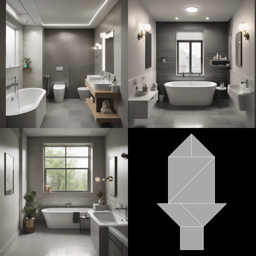

###################
page5-186 / none
altar (altar)
lighthouse top (beacon)
a flower bud (bud)
candle in holder (candle)
candle (candle)
corn (corn)
take a book, leave a book library on the side of the road (library)
a pot (pot)
sword (sword)
torch, candle, cake on platter (torch)
---------------
candle (2); library (1); lighthouse top (1); sword (1); torch (1); pot (1); corn (1); flower bud (1); altar (1)


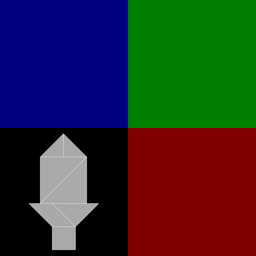

###################
page5-186 / bedroom
lighthouse (beacon)
candle (candle)
dagger (dagger)
house on dirt (house)
lamp stand (lamp)
light (light)
bathroom mirror (mirror)
pot (pot)
torch (torch)
it looks like a vase (vase)
---------------
pot (1); lighthouse (1); light (1); candle (1); torch (1); dagger (1); vase (1); house (1); lamp (1); mirror (1)


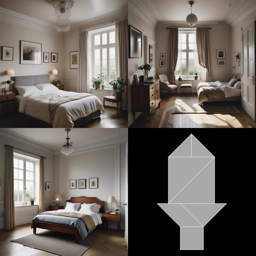

###################


In [5]:
selection = _ann_df.loc[np.logical_and(_ann_df.tangram == 'page5-186', _ann_df.scene.isin(['bathroom', 'bedroom', 'none']))]
order = selection.wn_lemma.map(lambda x: max(Counter(x).values())).sort_values(ascending=False).index
selection = selection.loc[order]
display_examples(selection)

page5-153 / beach
the tangram looks like a bathtub. (bathtub)
bowl (bowl)
bull (bull)
crab (crab)
crab (crab)
crab (crab)
crab (crab)
an upside-down crab (crab)
looks like a crab (crab)
crab (crab)
---------------
crab (7); bathtub (1); bowl (1); bull (1)


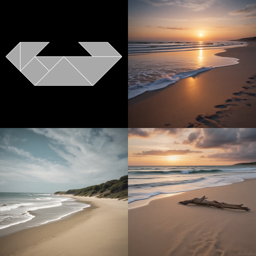

###################
page5-153 / bathroom
bathtub shape (bathtub)
bowl (bowl)
a bowl (bowl)
a crab (crab)
crab (crab)
bathroom sink (sink)
sink (sink)
sink (sink)
sink (sink)
sink or bathtub (sink)
---------------
sink (5); bowl (2); crab (2); bathtub shape (1)


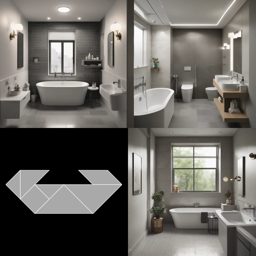

###################
page5-153 / none
bowl (bowl)
bowl (bowl)
latter c (c)
crab (crab)
crab (crab)
crab, seashell (crab)
crab (crab)
dog (dog)
a seal (sealing_wax)
space ship (starship)
---------------
crab (4); bowl (2); dog (1); seal (1); letter c (1); space ship (1)


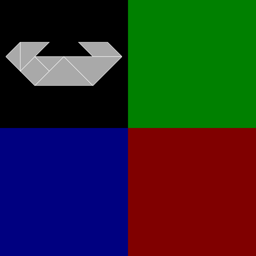

###################


In [6]:
selection = _ann_df.loc[np.logical_and(_ann_df.tangram == 'page5-153', _ann_df.scene.isin(['beach', 'bathroom', 'none']))]
order = selection.wn_lemma.map(lambda x: max(Counter(x).values())).sort_values(ascending=False).index
selection = selection.loc[order]
display_examples(selection)

page3-182 / beach
an airplane, graduation cap (airplane)
wing suit (apparel)
box kite (box_kite)
kite (kite)
a map (map)
tie (necktie)
origami (origami)
sailboat (sailboat)
turtle (turtle)
turtle (turtle)
---------------
turtle (2); sailboat (1); wing suit (1); origami (1); airplane (1); kite (1); box kite (1); tie (1); map (1)


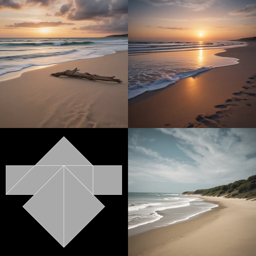

###################
page3-182 / sea_bottom
sea ray (boat)
water fountain (drinking_fountain)
i don't see much of anything. but i guess maybe a duck with sunglasses (duck)
iceberg (iceberg)
person laying on their back (person)
pyramids (pyramid)
radio (radio_receiver)
stingray (stingray)
stingray (stingray)
swimming turtle (turtle)
---------------
stingray (2); person (1); radio (1); iceberg (1); turtle (1); pyramids (1); water fountain (1); sea ray (1); duck (1)


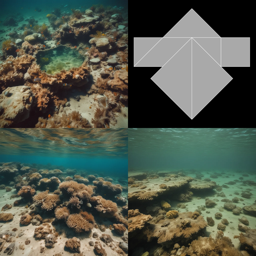

###################
page3-182 / sky
aeroplane (airplane)
airplane (airplane)
tissue box (box)
kite (kite)
monkey face wearing goggles (monkey)
pyramids (pyramid)
a shell (shell)
spaceship (starship)
stealth bomber (stealth_bomber)
stingray (stingray)
---------------
pyramids (1); monkey face (1); aeroplane (1); kite (1); shell (1); airplane (1); stealth bomber (1); tissue box (1); stingray (1); spaceship (1)


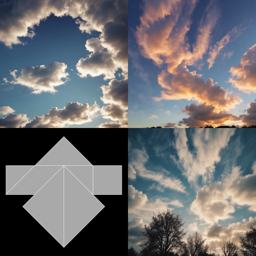

###################


In [7]:
selection = _ann_df.loc[np.logical_and(_ann_df.tangram == 'page3-182', _ann_df.scene.isin(['beach', 'sea_bottom', 'sky']))]
order = selection.wn_lemma.map(lambda x: max(Counter(x).values())).sort_values(ascending=False).index
selection = selection.loc[order]
display_examples(selection)